<h1>Análise de Dados INEP 2023</h1>
<h2>Como fatores além estudo impactam a Prova?</h2>
<h3>Isac Vieira</h3>
<p style="font-size:15px;">12/24</p>

<body>
<h2>Definição de Objetivo:</h2>
<p>Por intuição podemos definir que fatores de tempo/qualidade de estudo não são os únicos que impactam os resultados de uma prova. Nessa análise, nosso objetivo é analisar os dados do ENEM de 2023 e obter conclusões não apenas sobre a existência da desigualdade mas o quanto ela impacta.</p>
<h2>Definição de Principais Perguntas:</h2>
<ul>
<li>Qual faixa etária teve o melhor desepenho?</li>
<li>As notas do Enem variam com a renda familiar?</li>
<li>O nível de escolaridade dos pais influencia as notas dos estudantes?</li>
<li>As notas diferem significativamente entre homens e mulheres?</li>
<li>Qual é a distribuição de notas por etnia/cor/raça e há diferenças marcantes?</li>
<li>O tipo de dependência administrativa da escola (pública/privada) afeta as notas?</li>
<li>Qual é o perfil de pessoas que tinham como objetivo passar em Medicina/Cursos muito concorridos (750+)?</li>
<li>Qual é o perfil de pessoas que tiveram um mau desempenho na prova (-500)?</li>
</ul>
<h2>Próximas Perguntas (Próximas Análises):</h2>
<ul>
<li>Pessoas com acesso a internet tiveram um desempenho melhor?</li>
<li>Pessoas com acesso a computador tiveram um desempenho melhor?</li>
<li>Escolas Urbanas têm vantagem de pontos em relação a escolas rurais? Qual o tamanho dessa vantagem?</li>
<li>Qual região tem melhor desempenho na Prova? Qual estado se sai melhor?</li>
</ul>
</body>

In [1]:
#pip install nbconvert

In [2]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
sns.set()

In [3]:
dfa = pd.read_csv(r'./microdados_enem_2023/DADOS/MICRODADOS_ENEM_2023.csv', encoding="latin1", sep = ';')
dfa.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [4]:
dfa.shape

(3933955, 76)

In [5]:
colex = [
    "NU_INSCRICAO", "NU_ANO", "TP_ESTADO_CIVIL", "TP_NACIONALIDADE", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", 
    "TP_ENSINO", "IN_TREINEIRO", "CO_MUNICIPIO_ESC", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT",
    "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT",
    "CO_PROVA_CN",	"CO_PROVA_CH",	"CO_PROVA_LC",	"CO_PROVA_MT",
    "NU_NOTA_COMP1",	"NU_NOTA_COMP2",	"NU_NOTA_COMP3", 	"NU_NOTA_COMP4",	"NU_NOTA_COMP5",
    "CO_MUNICIPIO_PROVA", "NO_MUNICIPIO_PROVA", "CO_UF_PROVA", 	"SG_UF_PROVA", "Q002",	"Q003",	"Q004",	"Q005",
    'Q007',	'Q008',	'Q009',	'Q010',	'Q011',	'Q012',	'Q013', 'Q014',	'Q015',	'Q016',	'Q017',	'Q018',	'Q019',	'Q020',	'Q021',	'Q022',	'Q023',	'Q024',	'Q025',
    'CO_UF_ESC', 'NO_MUNICIPIO_ESC', 'TP_SIT_FUNC_ESC',	'TP_PRESENCA_CN',	'TP_PRESENCA_CH',	'TP_PRESENCA_LC',	'TP_PRESENCA_MT',
    'TP_LINGUA',	'TP_STATUS_REDACAO'
]

df = dfa.drop(columns = colex)

In [6]:
df.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q006
0,14,M,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,F
1,12,M,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,H
2,6,F,1,1,NaN,NaN,NaN,502.0,498.9,475.6,363.2,700.0,H,C
3,2,F,3,2,CE,2.0,1.0,459.0,508.5,507.2,466.7,880.0,D,C
4,3,F,3,2,CE,2.0,1.0,402.5,379.2,446.9,338.3,560.0,B,B


In [7]:
#Dimensão do dataset
print("Dimensão:", df.shape)

Dimensão: (3933955, 14)


<body>
<h2>Tratamento de Dados</h2>
</body>

In [8]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ESCOLA                       0
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
NU_NOTA_REDACAO           1111312
Q001                            0
Q006                            0
dtype: int64

Abaixo poderíamos fazer o tratamento dos dados trocado simplesmente pela mediana dos dados, porém após alguns testes, isso trouxe um enviesamento muito grande nos dados, logo é intencional deixar os valores NaN do jeito que estão pelo bem da análise. Posteriormente pode ser interessante usar algum algoritmo de ML para fazer um tratamento adequando evitando esse risco.

In [9]:
'''
df.replace(["nan", "NaN"], np.nan, inplace=True)
df['NU_NOTA_CN'] = df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].median())
df['NU_NOTA_CH'] = df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].median())
df['NU_NOTA_LC'] = df['NU_NOTA_LC'].fillna(df['NU_NOTA_LC'].median())
df['NU_NOTA_MT'] = df['NU_NOTA_MT'].fillna(df['NU_NOTA_MT'].median())
df['NU_NOTA_REDACAO'] = df['NU_NOTA_REDACAO'].fillna(df['NU_NOTA_REDACAO'].median())
df.head()
'''

'\ndf.replace(["nan", "NaN"], np.nan, inplace=True)\ndf[\'NU_NOTA_CN\'] = df[\'NU_NOTA_CN\'].fillna(df[\'NU_NOTA_CN\'].median())\ndf[\'NU_NOTA_CH\'] = df[\'NU_NOTA_CH\'].fillna(df[\'NU_NOTA_CH\'].median())\ndf[\'NU_NOTA_LC\'] = df[\'NU_NOTA_LC\'].fillna(df[\'NU_NOTA_LC\'].median())\ndf[\'NU_NOTA_MT\'] = df[\'NU_NOTA_MT\'].fillna(df[\'NU_NOTA_MT\'].median())\ndf[\'NU_NOTA_REDACAO\'] = df[\'NU_NOTA_REDACAO\'].fillna(df[\'NU_NOTA_REDACAO\'].median())\ndf.head()\n'

In [10]:
df['media_notas'] = df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

In [11]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ESCOLA                       0
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
NU_NOTA_REDACAO           1111312
Q001                            0
Q006                            0
media_notas               1097149
dtype: int64

O mesmo aqui, é uma base muito grande para simplesmente trocarmos pela moda da categoria mais utilizada.

In [12]:
'''
df.replace(["nan", "NaN"], np.nan, inplace=True)
df['SG_UF_ESC'] = df['SG_UF_ESC'].fillna(df['SG_UF_ESC'].mode()[0])
df['TP_DEPENDENCIA_ADM_ESC'] = df['TP_DEPENDENCIA_ADM_ESC'].fillna(df['TP_DEPENDENCIA_ADM_ESC'].mode()[0])
df['TP_LOCALIZACAO_ESC'] = df['TP_LOCALIZACAO_ESC'].fillna(df['TP_LOCALIZACAO_ESC'].mode()[0])
df.head()
'''

'\ndf.replace(["nan", "NaN"], np.nan, inplace=True)\ndf[\'SG_UF_ESC\'] = df[\'SG_UF_ESC\'].fillna(df[\'SG_UF_ESC\'].mode()[0])\ndf[\'TP_DEPENDENCIA_ADM_ESC\'] = df[\'TP_DEPENDENCIA_ADM_ESC\'].fillna(df[\'TP_DEPENDENCIA_ADM_ESC\'].mode()[0])\ndf[\'TP_LOCALIZACAO_ESC\'] = df[\'TP_LOCALIZACAO_ESC\'].fillna(df[\'TP_LOCALIZACAO_ESC\'].mode()[0])\ndf.head()\n'

In [13]:
#Checando os valores nulos com is_null().sum()
df.isnull().sum()

TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_COR_RACA                     0
TP_ESCOLA                       0
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
NU_NOTA_CN                1241528
NU_NOTA_CH                1111312
NU_NOTA_LC                1111312
NU_NOTA_MT                1241528
NU_NOTA_REDACAO           1111312
Q001                            0
Q006                            0
media_notas               1097149
dtype: int64

<body>
<h2>Distribuição de Nota por Participantes</h2>
</body>


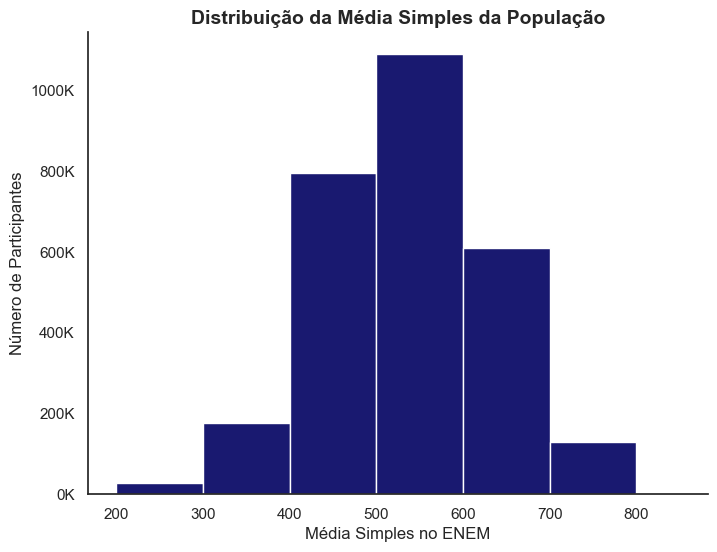

In [14]:
sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples da População', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

<body>
<h2>Distribuição de Faixa Etária</h2>
</body>


In [15]:
df['TP_FAIXA_ETARIA'].astype('str')

0          14
1          12
2           6
3           2
4           3
           ..
3933950    12
3933951     1
3933952     3
3933953     2
3933954     3
Name: TP_FAIXA_ETARIA, Length: 3933955, dtype: object

<Figure size 640x480 with 0 Axes>

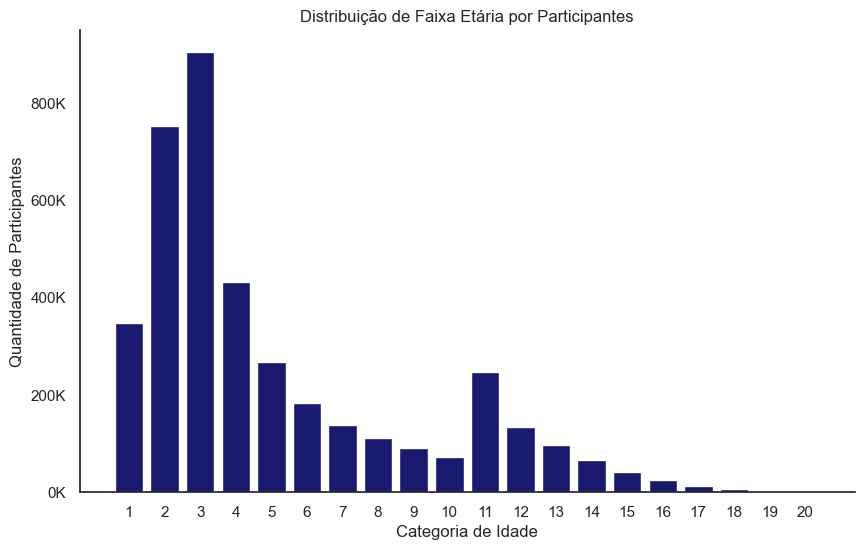

In [16]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['TP_FAIXA_ETARIA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de Faixa Etária por Participantes')
plt.xlabel('Categoria de Idade')
plt.ylabel('Quantidade de Participantes')
plt.xticks(unique, rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
    <h3>Categorias de Faixa Etária</h3>
    <h5>1: Menor de 17 anos</h5>
    <h5>2: 17 anos</h5>
    <h5>3: 18 anos</h5>
    <h5>4: 19 anos</h5>
    <h5>5: 20 anos</h5>
    <h5>6: 21 anos</h5>
    <h5>7: 22 anos</h5>
    <h5>8: 23 anos</h5>
    <h5>9: 24 anos</h5>
    <h5>10: 25 anos</h5>
    <h5>11: Entre 26 e 30 anos</h5>
    <h5>12: Entre 31 e 35 anos</h5>
    <h5>13: Entre 36 e 40 anos</h5>
    <h5>14: Entre 41 e 45 anos</h5>
    <h5>15: Entre 46 e 50 anos</h5>
    <h5>16: Entre 51 e 55 anos</h5>
    <h5>17: Entre 56 e 60 anos</h5>
    <h5>18: Entre 61 e 65 anos</h5>
    <h5>19: Entre 66 e 70 anos</h5>
    <h5>20: Maior de 70 anos</h5>
</body>



<Figure size 640x480 with 0 Axes>

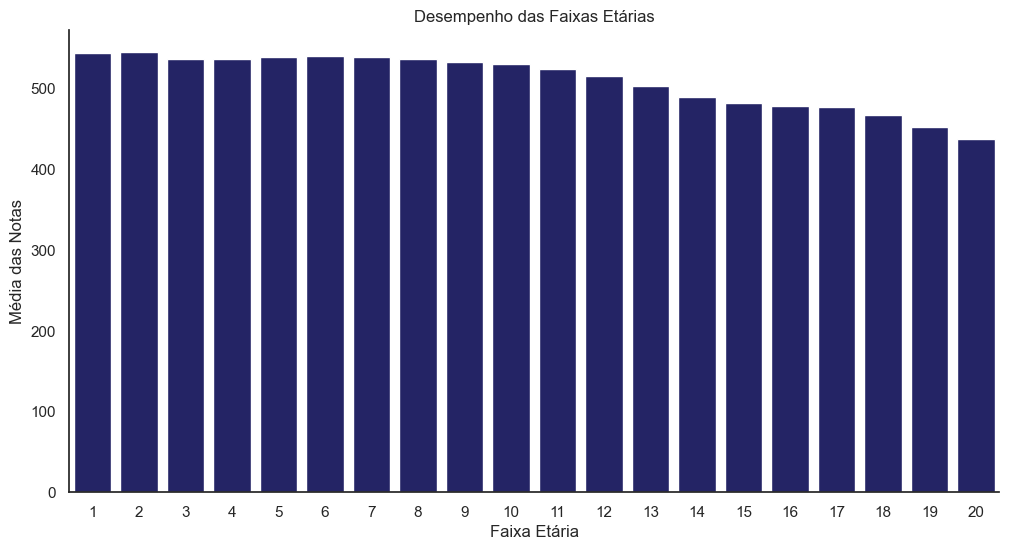

In [17]:
# Agrupar as faixas etárias e calcular a média das notas
faixa_etaria= df.groupby('TP_FAIXA_ETARIA')['media_notas'].mean().reset_index()

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de barras com Matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='TP_FAIXA_ETARIA', y='media_notas', data=faixa_etaria, color='midnightblue')

# Definindo título e rótulos
plt.title('Desempenho das Faixas Etárias')
plt.xlabel('Faixa Etária')
plt.ylabel('Média das Notas')

# Ajustando as categorias no eixo X
sns.despine(top = True, right = True)
plt.xticks(rotation=0)  # Girar os rótulos do eixo X para visualização

# Exibindo o gráfico
plt.show()

<body>
    <h3>Categorias de Faixa Etária</h3>
    <h5>1: Menor de 17 anos</h5>
    <h5>2: 17 anos</h5>
    <h5>3: 18 anos</h5>
    <h5>4: 19 anos</h5>
    <h5>5: 20 anos</h5>
    <h5>6: 21 anos</h5>
    <h5>7: 22 anos</h5>
    <h5>8: 23 anos</h5>
    <h5>9: 24 anos</h5>
    <h5>10: 25 anos</h5>
    <h5>11: Entre 26 e 30 anos</h5>
    <h5>12: Entre 31 e 35 anos</h5>
    <h5>13: Entre 36 e 40 anos</h5>
    <h5>14: Entre 41 e 45 anos</h5>
    <h5>15: Entre 46 e 50 anos</h5>
    <h5>16: Entre 51 e 55 anos</h5>
    <h5>17: Entre 56 e 60 anos</h5>
    <h5>18: Entre 61 e 65 anos</h5>
    <h5>19: Entre 66 e 70 anos</h5>
    <h5>20: Maior de 70 anos</h5>
</body>



<body>
    <p>Percebe-se a medida que a idade aumenta existe uma tendência que a nota média decaia.</p>


<body>
<h3>Distribuição de Renda por Participantes</h3>
</body>

<Figure size 640x480 with 0 Axes>

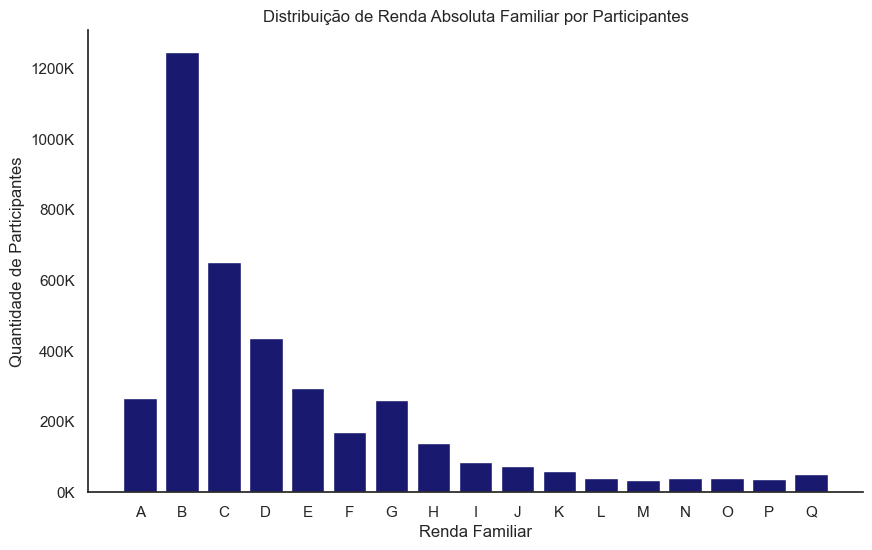

In [46]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['Q006'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de Renda Absoluta Familiar por Participantes')
plt.xlabel('Renda Familiar')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
<h3>Faixas de Renda Familiar</h3>
<body>
  <h5>A: Nenhuma Renda</h5>
    
  <h5>B: Até R$ 1.320,00</h5>
  
  <h5>C: De R$ 1.320,01 até R$ 1.980,00</h5>
  <h5>D: De R$ 1.980,01 até R$ 2.640,00</h5>
  <h5>E: De R$ 2.640,01 até R$ 3.300,00</h5>
  <h5>F: De R$ 3.300,01 até R$ 3.960,00</h5>
  <h5>G: De R$ 3.960,01 até R$ 5.280,00</h5>
  <h5>H: De R$ 5.280,01 até R$ 6.600,00</h5>
  <h5>I: De R$ 6.600,01 até R$ 7.920,00</h5>
  <h5>J: De R$ 7.920,01 até R$ 9.240,00</h5>
  <h5>K: De R$ 9.240,01 até R$ 10.560,00</h5>
  <h5>L: De R$ 10.560,01 até R$ 11.880,00</h5>
  <h5>M: De R$ 11.880,01 até R$ 13.200,00</h5>
  <h5>N: De R$ 13.200,01 até R$ 15.840,00</h5>
  <h5>O: De R$ 15.840,01 até R$ 19.800,00</h5>
  <h5>P: De R$ 19.800,01 até R$ 26.400,00</h5>
  <h5>Q: Acima de R$ 26.400,00</h5>
</body>


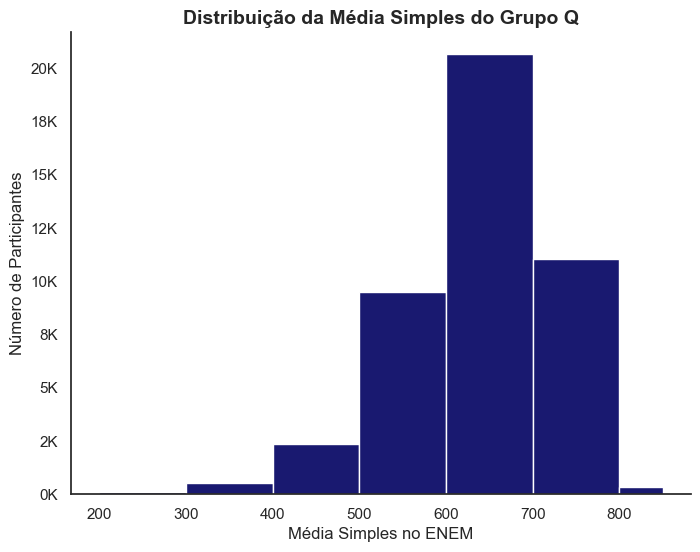

In [19]:
df_q = df[df['Q006'] == 'Q']

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples do Grupo Q', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

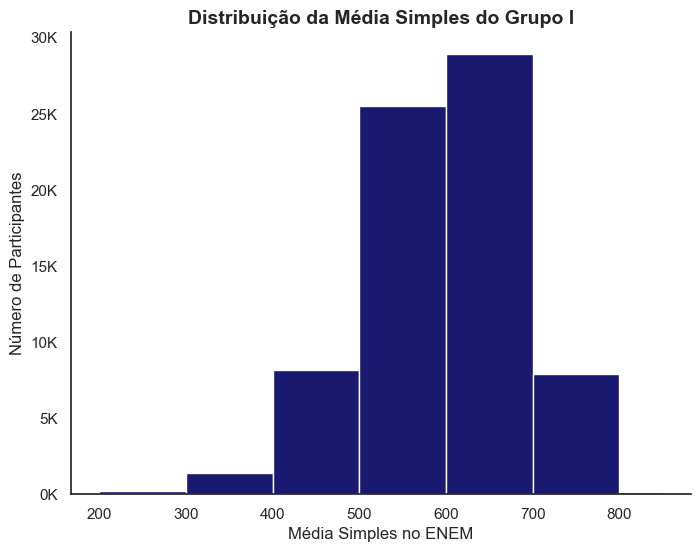

In [20]:
df_q = df[df['Q006'] == 'I']

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples do Grupo I', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

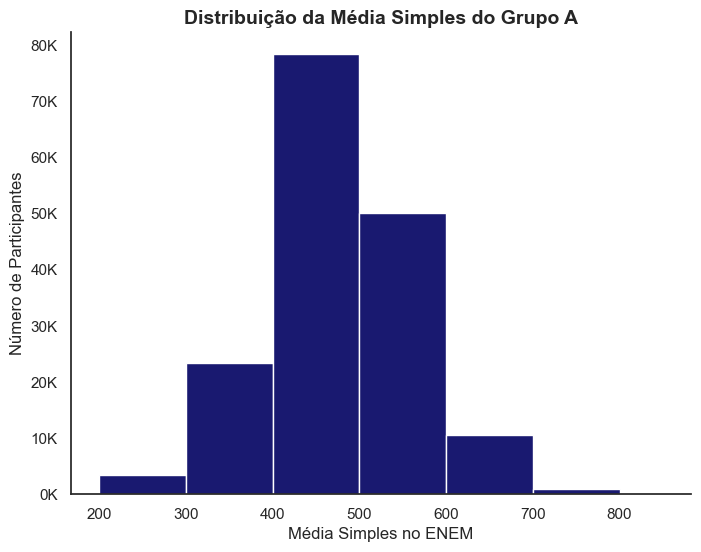

In [21]:
df_q = df[df['Q006'] == 'A']

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples do Grupo A', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

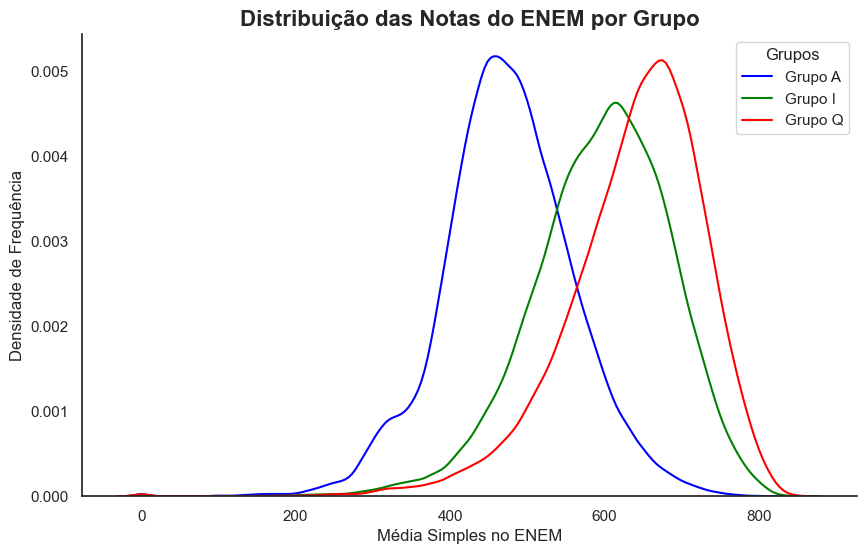

In [22]:
# Filtrando os dados para os três grupos A, I e Q
df_a = df[df['Q006'] == 'A']
df_i = df[df['Q006'] == 'I']
df_q = df[df['Q006'] == 'Q']

# Definindo o estilo do gráfico
sns.set_style('white')

# Criando a figura para o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições de notas para cada grupo
sns.kdeplot(df_a['media_notas'].to_numpy(), label='Grupo A', color='blue', fill=False)
sns.kdeplot(df_i['media_notas'].to_numpy(), label='Grupo I', color='green', fill=False)
sns.kdeplot(df_q['media_notas'].to_numpy(), label='Grupo Q', color='red', fill=False)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Notas do ENEM por Grupo', fontsize=16, weight='bold')
plt.xlabel('Média Simples no ENEM', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

# Adicionando legenda
plt.legend(title='Grupos', loc='upper right')
sns.despine(top = True, right = True)

# Exibindo o gráfico
plt.show()

<body>
    <h4>Percepção da Diferença nas Notas com a Situação Econômica Familiar</h4>


<body>
    <p>Percebe-se que existe uma diferença significativa da nota com a situação econômica familiar, com o grupo A (Nenhuma Renda) apresentando notas mais centralizadas à esquerda, indicando um desempenho mais baixo.</p>


<body>
<p>O grupo Q (Acima de R$ 26.400) tem sua média simples à direita, sugerindo um desempenho superior.</p>
    

<body>
<p>Já o grupo I (De R$ 6.600,01 até  R$ 7.920,00) manteve uma distribuição de notas no centro, mostrando uma performance média comparada aos outros grupos. A partir de sua média, pode-se observar como o nível de renda impacta diretamente no desempenho.</p>

<body>
  <h2>O nível de escolaridade do pai influencia na nota dos filhos?</h2>
</body>


<body>
  <h4>Categorias de Escolarização</h4>
  <ul>
    <li>A: Nunca estudou.</li>
    <li>B: Não completou a 4ª série/5º ano do Ensino Fundamental.</li>
    <li>C: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.</li>
    <li>D: Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.</li>
    <li>E: Completou o Ensino Médio, mas não completou a Faculdade.</li>
    <li>F: Completou a Faculdade, mas não completou a Pós-graduação.</li>
    <li>G: Completou a Pós-graduação.</li>
    <li>H: Não sei.</li>
  </ul>
</body>



<Figure size 640x480 with 0 Axes>

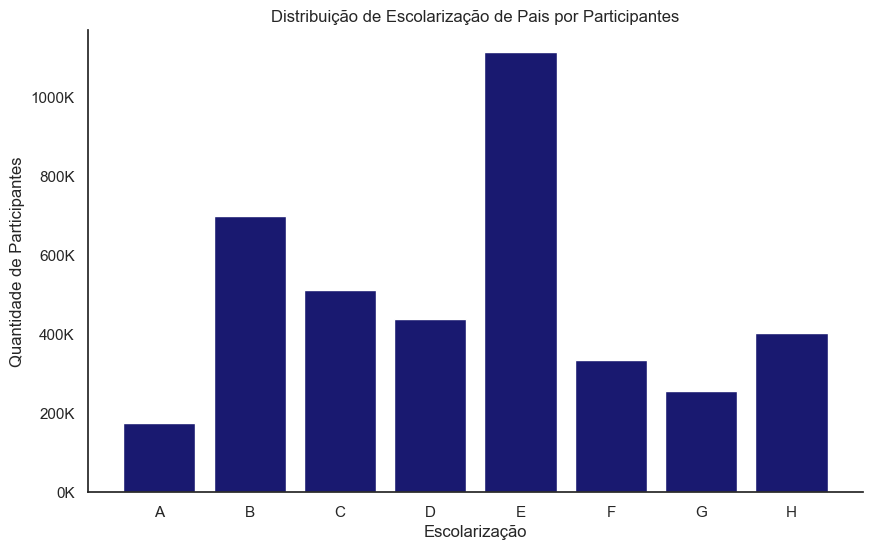

In [23]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['Q001'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de Escolarização de Pais por Participantes')
plt.xlabel('Escolarização')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

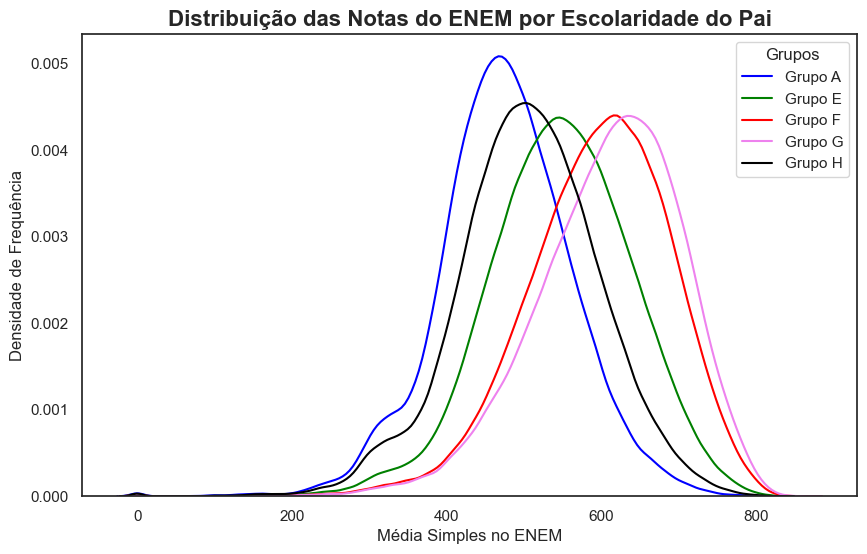

In [24]:
# Filtrando os dados para os três grupos A, I e Q
df_a = df[df['Q001'] == 'A']
df_e = df[df['Q001'] == 'E']
df_f = df[df['Q001'] == 'F']
df_g = df[df['Q001'] == 'G']
df_h = df[df['Q001'] == 'H']

# Definindo o estilo do gráfico
sns.set_style('white')

# Criando a figura para o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições de notas para cada grupo
sns.kdeplot(df_a['media_notas'].to_numpy(), label='Grupo A', color='blue', fill=False)
sns.kdeplot(df_e['media_notas'].to_numpy(), label='Grupo E', color='green', fill=False)
sns.kdeplot(df_f['media_notas'].to_numpy(), label='Grupo F', color='red', fill=False)
sns.kdeplot(df_g['media_notas'].to_numpy(), label='Grupo G', color='violet', fill=False)
sns.kdeplot(df_h['media_notas'].to_numpy(), label='Grupo H', color='black', fill=False)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Notas do ENEM por Escolaridade do Pai', fontsize=16, weight='bold')
plt.xlabel('Média Simples no ENEM', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

# Adicionando legenda
plt.legend(title='Grupos', loc='upper right')

# Exibindo o gráfico
plt.show()

<body>
  <h4>Temos:</h4>
  <ul>
    <li>A: Nunca estudou.</li>
    <li>E: Completou o Ensino Médio, mas não completou a Faculdade.</li>
    <li>F: Completou a Faculdade, mas não completou a Pós-graduação.</li>
    <li>G: Completou a Pós-graduação.</li>
    <li>H: Não sei.</li>
  </ul>
  <h4>É interessante notar que quanto maior a escolarização da figura paterna existe maior tendência de aumento na nota do ENEM. Isso só não se mostra verdade quando não saber a escolaridade tem tendência melhor do que, saber a escolaridade do pai porém ela ser do grupo A.</h4>
</body>



<body>
  <h2>Existe diferença entre notas quando falamos de homens/mulheres?</h2>
</body>


<Figure size 640x480 with 0 Axes>

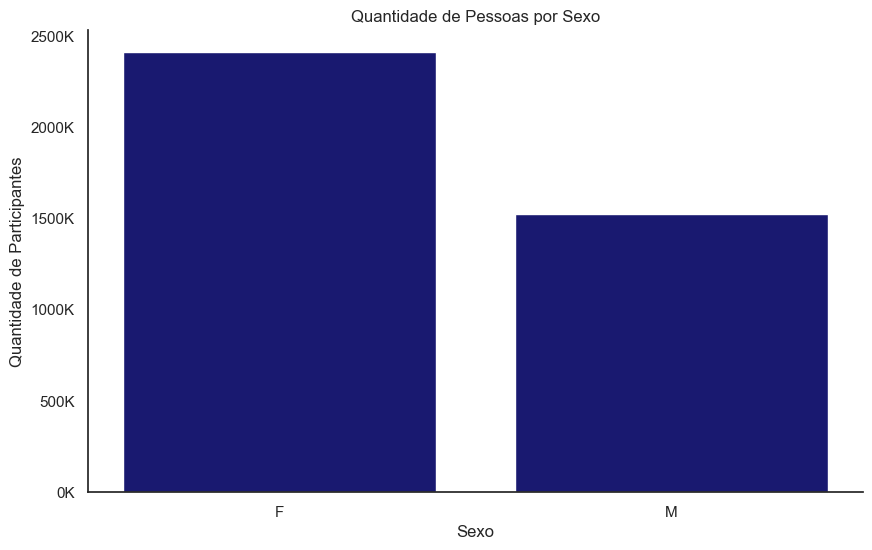

In [25]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['TP_SEXO'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

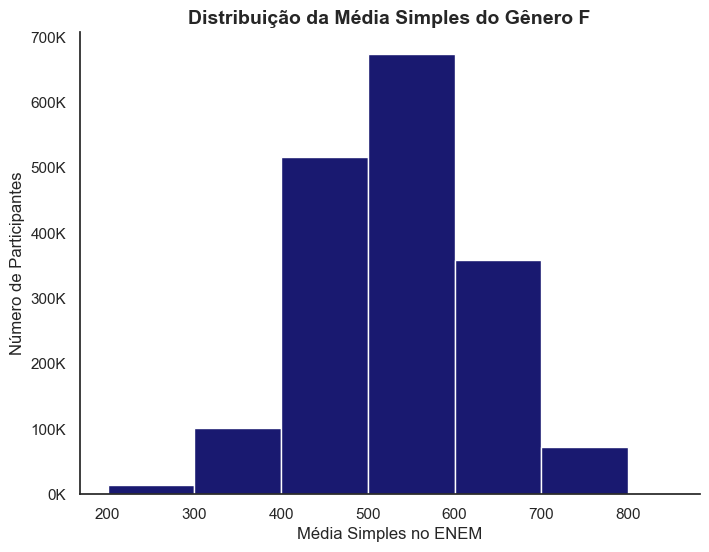

In [26]:
df_q = df[df['TP_SEXO'] == 'F']

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples do Gênero F', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

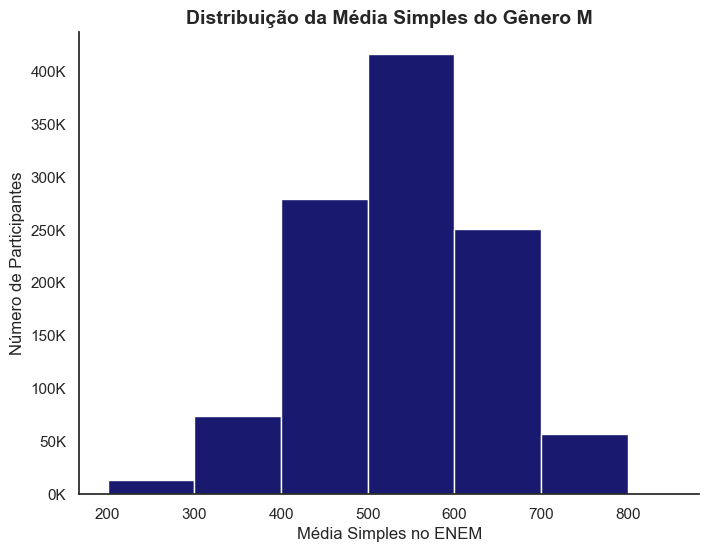

In [27]:
df_q = df[df['TP_SEXO'] == 'M']

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples do Gênero M', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

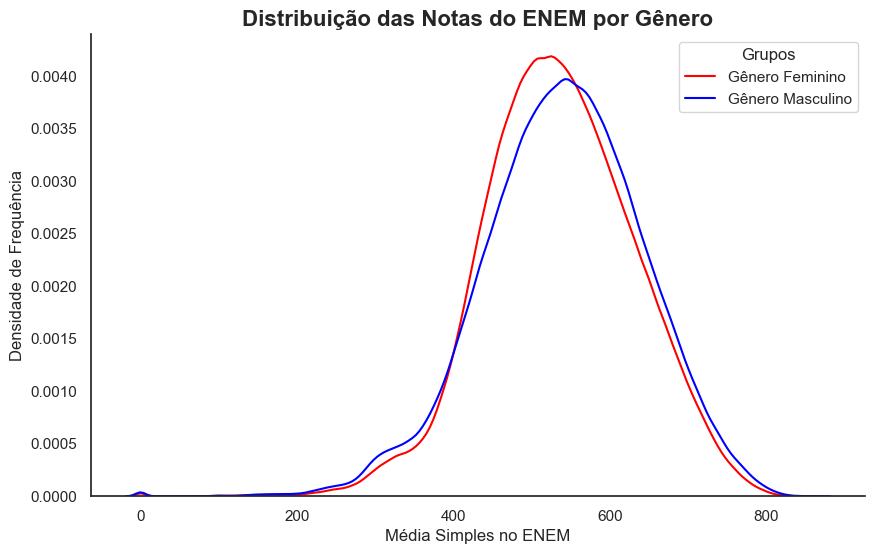

In [28]:
# Filtrando os dados para os três grupos A, I e Q
df_f = df[df['TP_SEXO'] == 'F']
df_m = df[df['TP_SEXO'] == 'M']

# Definindo o estilo do gráfico
sns.set_style('white')

# Criando a figura para o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições de notas para cada grupo
sns.kdeplot(df_f['media_notas'].to_numpy(), label='Gênero Feminino', color='red', fill=False)
sns.kdeplot(df_m['media_notas'].to_numpy(), label='Gênero Masculino', color='blue', fill=False)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Notas do ENEM por Gênero', fontsize=16, weight='bold')
plt.xlabel('Média Simples no ENEM', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

# Adicionando legenda
plt.legend(title='Grupos', loc='upper right')
sns.despine(top = True, right = True)

# Exibindo o gráfico
plt.show()

<body>
  <h4>Não existe uma diferença significativa ao comparamos os dados de homens e mulheres nos dados.</h4>
</body>


<body>
  <h2>Existe diferença de notas entre etnias? </h2>
   <h4>(Estamos falando de racismo estrutural, não existe apoio para racismo científico aqui ok?)</h4>
</body>


<Figure size 640x480 with 0 Axes>

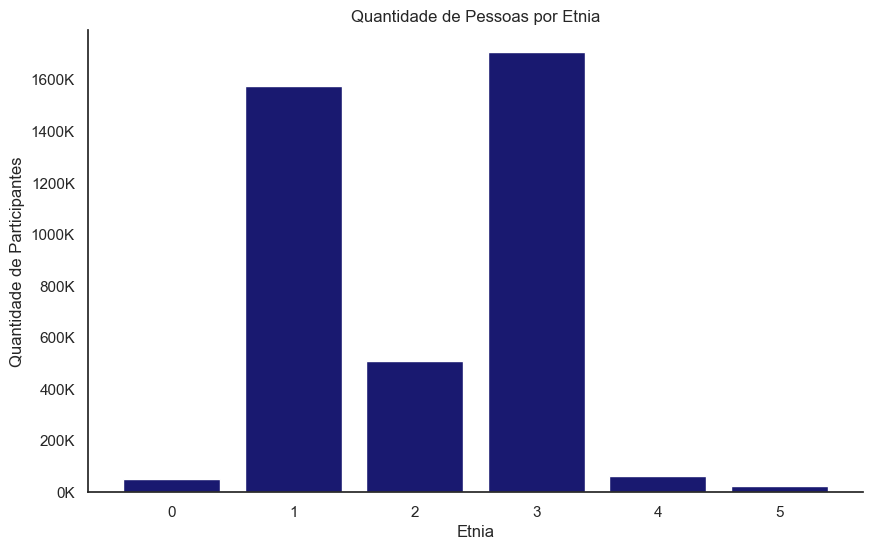

In [29]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['TP_COR_RACA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Etnia')
plt.xlabel('Etnia')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Etnias:</h4>
  <ul>
    <li>0: Não declarado</li>
    <li>1: Branca</li>
    <li>2: Preta</li>
    <li>3: Parda</li>
    <li>4: Amarela</li>
    <li>5: Indígena</li>
    <li>6: Não dispõe da informação</li>
  </ul>
</body>


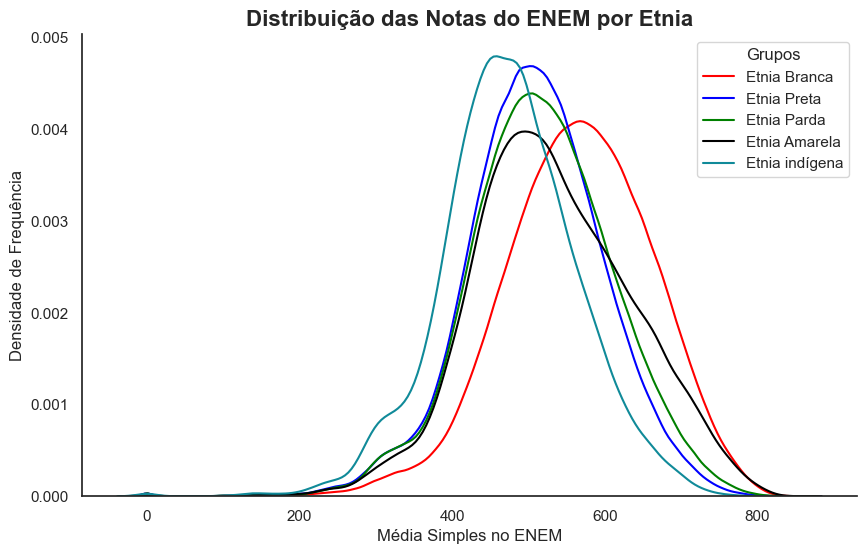

In [30]:
df_1 = df[df['TP_COR_RACA'] == 1]
df_2 = df[df['TP_COR_RACA'] == 2]
df_3 = df[df['TP_COR_RACA'] == 3]
df_4= df[df['TP_COR_RACA'] == 4]
df_5 = df[df['TP_COR_RACA'] == 5]

# Definindo o estilo do gráfico
sns.set_style('white')

# Criando a figura para o gráfico
plt.figure(figsize=(10, 6))

# Plotando as distribuições de notas para cada grupo
sns.kdeplot(df_1['media_notas'].to_numpy(), label='Etnia Branca', color='red', fill=False)
sns.kdeplot(df_2['media_notas'].to_numpy(), label='Etnia Preta', color='blue', fill=False)
sns.kdeplot(df_3['media_notas'].to_numpy(), label='Etnia Parda', color='green', fill=False)
sns.kdeplot(df_4['media_notas'].to_numpy(), label='Etnia Amarela', color='black', fill=False)
sns.kdeplot(df_5['media_notas'].to_numpy(), label='Etnia indígena', color='#108A99', fill=False)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição das Notas do ENEM por Etnia', fontsize=16, weight='bold')
plt.xlabel('Média Simples no ENEM', fontsize=12)
plt.ylabel('Densidade de Frequência', fontsize=12)

# Adicionando legenda
plt.legend(title='Grupos', loc='upper right')
sns.despine(top = True, right = True)

# Exibindo o gráfico
plt.show()

<body>
  <h4>Fica claro que pessoas com etnia branca têm uma tendência maior a irem melhor no ENEM, e isso acaba por refletir a realidade dos estudantes brasileiros, enquanto o grupo com pior desempenho foi o de etnia indígena, indicando a falta de estrutura para essa etnia. Novamente, tratam-se de dados, essa análise não tem como objetivo reforçar nenhuma ideia relacionada a racismo, apenas mostra a realidade desigual enfrentada.</h4>
</body>


<body>
  <h2>Existe correlação de notas por escola pública/privada?</h2>
</body>


<Figure size 640x480 with 0 Axes>

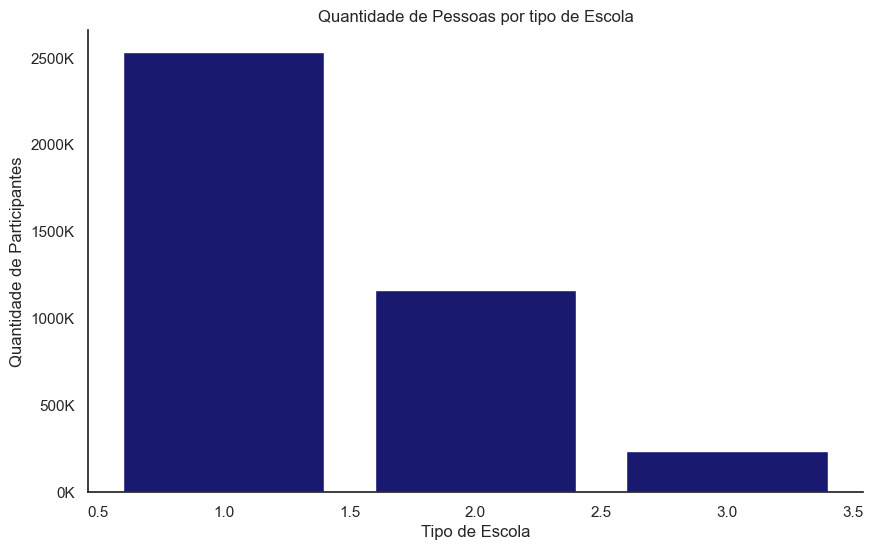

In [31]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df['TP_ESCOLA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Categorias:</h4>
  <ul>
    <li>1: Não Respondeu</li>
    <li>2: Pública</li>
    <li>3: Privada</li>
  </ul>
</body>


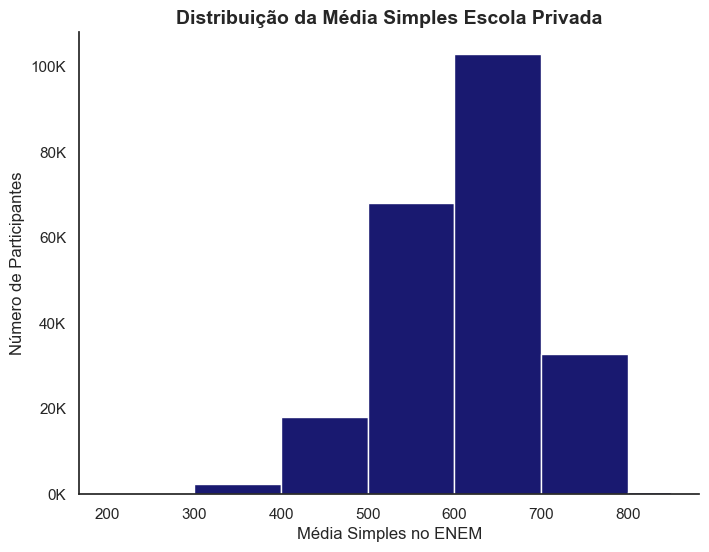

In [32]:
df_q = df[df['TP_ESCOLA'] == 3]

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples Escola Privada', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

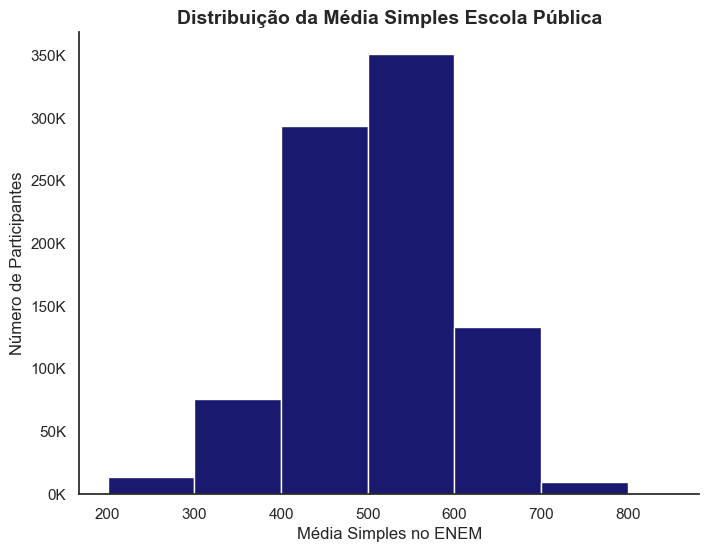

In [33]:
df_q = df[df['TP_ESCOLA'] == 2]

sns.set_style('white')
bins = [200, 300, 400, 500, 600, 700, 800, 850]
plt.figure(figsize = (8,6))
plt.hist(df_q['media_notas'], 
         bins = bins,
        color ='midnightblue')
plt.title('Distribuição da Média Simples Escola Pública', fontsize = 14, weight = 'bold')
plt.xlabel("Média Simples no ENEM")
plt.ylabel('Número de Participantes')
# Ajustando o eixo Y para exibir números em notação de milhar
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show()

<body>
  <h4>Existe uma diferença bem clara na distribuição de notas dos estudantes. Pessoas que fizeram seu ensino médio em escolas privadas tem uma tendência a terem melhores notas em comparação à aqueles que fizeram em escola pública.</h4>
</body>


<body>
  <h2>Qual o perfil das pessoas que tiraram acima de 750 no ENEM?</h2>
</body>


In [34]:
df_750 = df[df['media_notas'] >= 750]
df_750

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q006,media_notas
137,9,F,3,1,NaN,NaN,NaN,714.4,742.4,711.7,760.4,960.0,H,C,777.780000
646,3,F,1,1,NaN,NaN,NaN,711.0,656.3,660.6,813.2,920.0,E,D,752.220000
701,7,F,1,1,NaN,NaN,NaN,672.7,674.2,644.0,849.9,940.0,B,H,756.160000
707,4,M,1,1,NaN,NaN,NaN,713.3,730.1,676.7,832.9,880.0,F,E,766.600000
712,4,M,3,1,NaN,NaN,NaN,748.7,681.4,635.4,869.3,960.0,C,C,778.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930111,4,M,2,1,NaN,NaN,NaN,750.5,686.6,673.2,871.3,920.0,G,D,780.320000
3930797,4,M,1,1,NaN,NaN,NaN,757.9,706.6,683.9,793.6,900.0,B,C,768.400000
3930919,7,F,1,1,NaN,NaN,NaN,NaN,674.9,627.5,NaN,960.0,E,L,754.133333
3931336,6,F,1,1,NaN,NaN,NaN,724.1,735.5,674.9,819.1,980.0,F,I,786.720000


<Figure size 640x480 with 0 Axes>

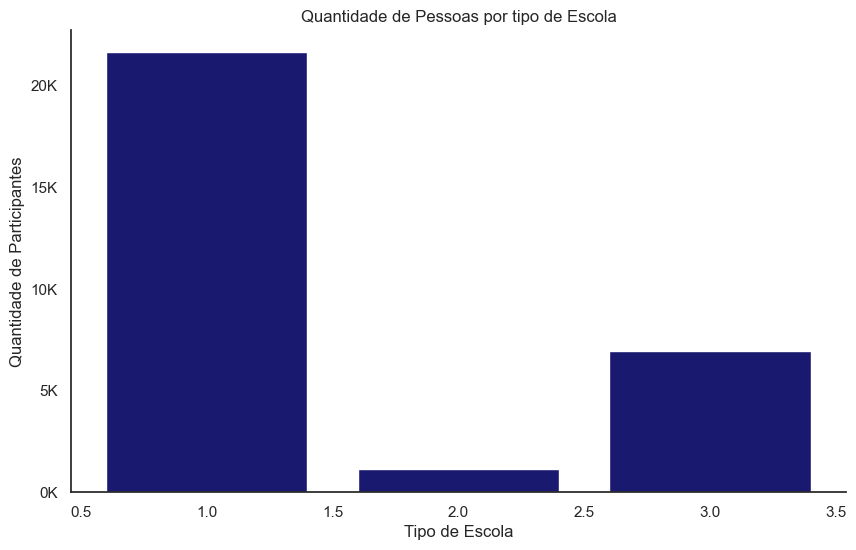

In [35]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_750['TP_ESCOLA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Categorias:</h4>
  <ul>
    <li>1: Não Respondeu</li>
    <li>2: Pública</li>
    <li>3: Privada</li>
  </ul>
</body>


<Figure size 640x480 with 0 Axes>

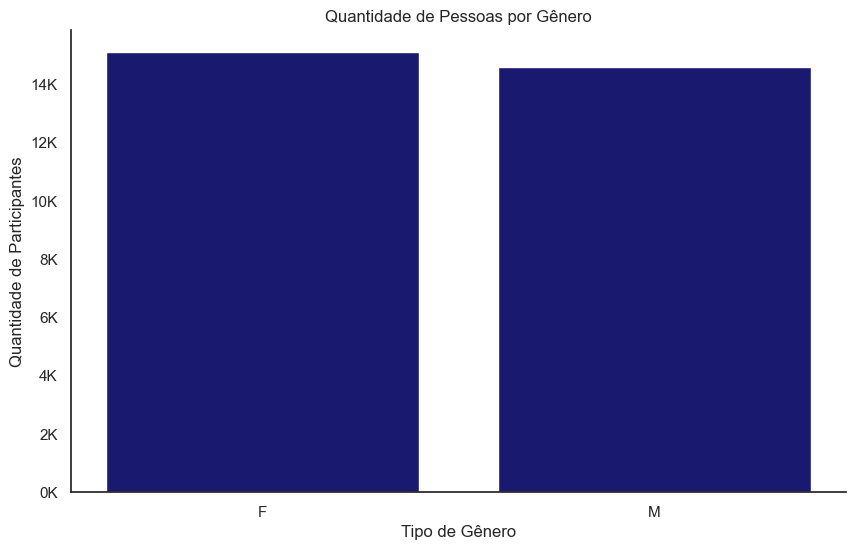

In [36]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_750['TP_SEXO'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Gênero')
plt.xlabel('Tipo de Gênero')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<Figure size 640x480 with 0 Axes>

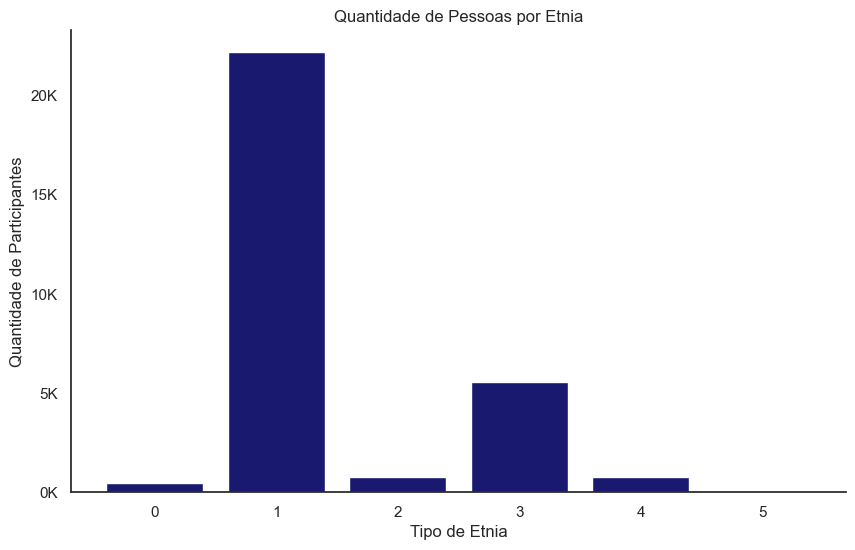

In [37]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_750['TP_COR_RACA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Etnia')
plt.xlabel('Tipo de Etnia')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Etnias:</h4>
  <ul>
    <li>0: Não declarado</li>
    <li>1: Branca</li>
    <li>2: Preta</li>
    <li>3: Parda</li>
    <li>4: Amarela</li>
    <li>5: Indígena</li>
    <li>6: Não dispõe da informação</li>
  </ul>
</body>


<Figure size 640x480 with 0 Axes>

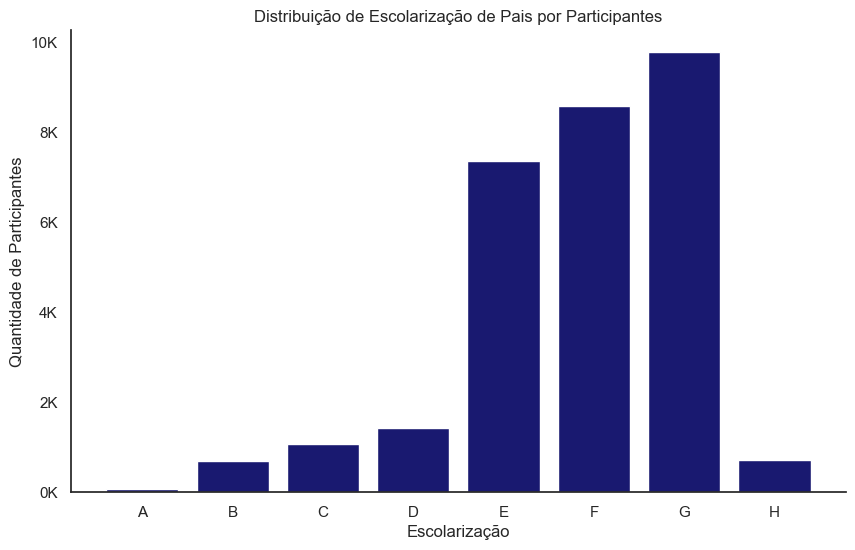

In [38]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_750['Q001'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de Escolarização de Pais por Participantes')
plt.xlabel('Escolarização')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<Figure size 640x480 with 0 Axes>

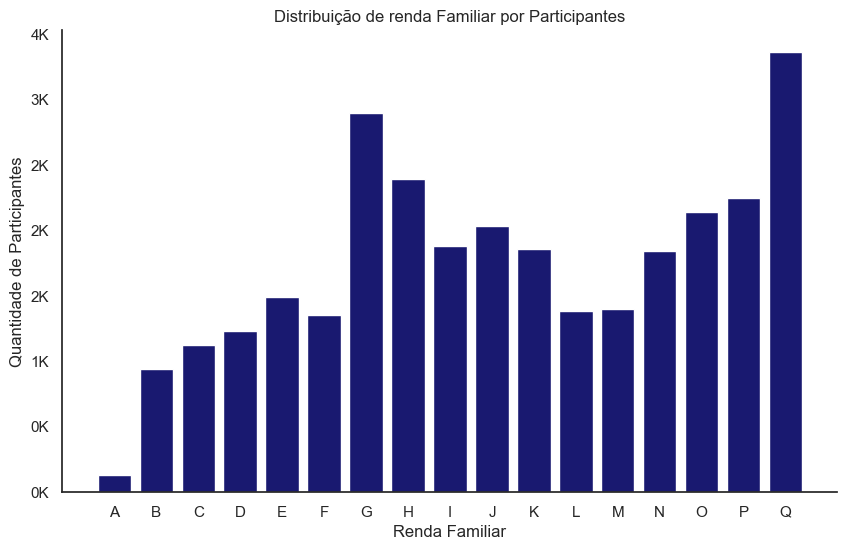

In [39]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_750['Q006'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de renda Familiar por Participantes')
plt.xlabel('Renda Familiar')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
<h3>Faixas de Renda Familiar</h3>
<body>
  <h5>A: Nenhuma Renda</h5>
    
  <h5>B: Até R$ 1.320,00</h5>
  
  <h5>C: De R$ 1.320,01 até R$ 1.980,00</h5>
  <h5>D: De R$ 1.980,01 até R$ 2.640,00</h5>
  <h5>E: De R$ 2.640,01 até R$ 3.300,00</h5>
  <h5>F: De R$ 3.300,01 até R$ 3.960,00</h5>
  <h5>G: De R$ 3.960,01 até R$ 5.280,00</h5>
  <h5>H: De R$ 5.280,01 até R$ 6.600,00</h5>
  <h5>I: De R$ 6.600,01 até R$ 7.920,00</h5>
  <h5>J: De R$ 7.920,01 até R$ 9.240,00</h5>
  <h5>K: De R$ 9.240,01 até R$ 10.560,00</h5>
  <h5>L: De R$ 10.560,01 até R$ 11.880,00</h5>
  <h5>M: De R$ 11.880,01 até R$ 13.200,00</h5>
  <h5>N: De R$ 13.200,01 até R$ 15.840,00</h5>
  <h5>O: De R$ 15.840,01 até R$ 19.800,00</h5>
  <h5>P: De R$ 19.800,01 até R$ 26.400,00</h5>
  <h5>Q: Acima de R$ 26.400,00</h5>
</body>

<body>
  <h2>Qual o perfil das pessoas que tiraram abaixo de 500 no ENEM?</h2>
</body>


In [40]:
df_500 = df[df['media_notas'] <= 500]
df_500

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_ESCOLA,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q006,media_notas
4,3,F,3,2,CE,2.0,1.0,402.5,379.2,446.9,338.3,560.0,B,B,425.38
15,7,F,3,1,NaN,NaN,NaN,510.8,313.4,388.5,415.6,560.0,B,A,437.66
17,11,F,1,1,NaN,NaN,NaN,435.3,515.0,452.8,448.2,480.0,B,B,466.26
25,8,F,3,1,NaN,NaN,NaN,494.2,442.8,552.4,382.1,620.0,C,B,498.30
26,4,F,3,1,NaN,NaN,NaN,424.9,529.4,512.8,398.6,540.0,F,D,481.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3933920,2,F,1,2,NaN,NaN,NaN,326.3,470.2,471.5,387.0,340.0,C,D,399.00
3933921,3,M,1,2,RS,2.0,1.0,585.1,437.6,601.0,554.7,320.0,E,H,499.68
3933930,19,M,1,1,NaN,NaN,NaN,464.6,564.0,501.2,423.7,400.0,B,C,470.70
3933936,3,M,1,2,RS,2.0,1.0,530.0,529.6,560.2,494.5,0.0,C,F,422.86


<Figure size 640x480 with 0 Axes>

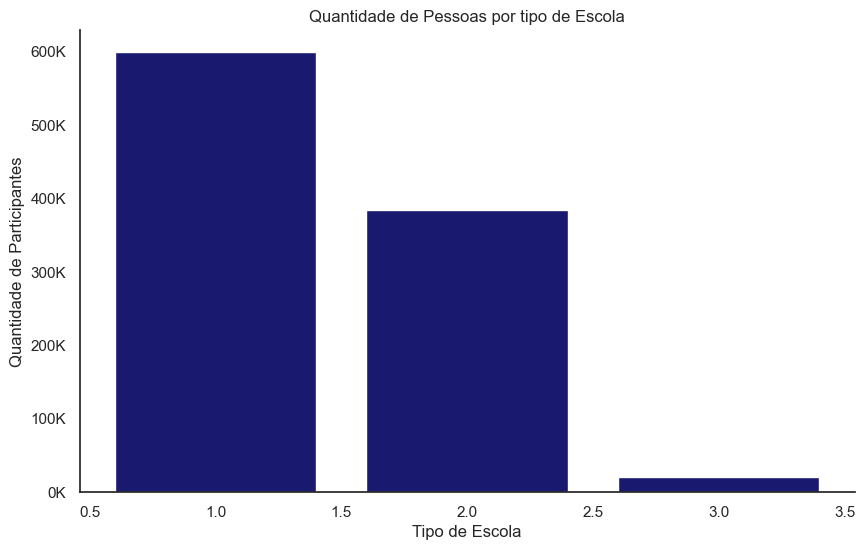

In [41]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_500['TP_ESCOLA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Categorias:</h4>
  <ul>
    <li>1: Não Respondeu</li>
    <li>2: Pública</li>
    <li>3: Privada</li>
  </ul>
</body>


<Figure size 640x480 with 0 Axes>

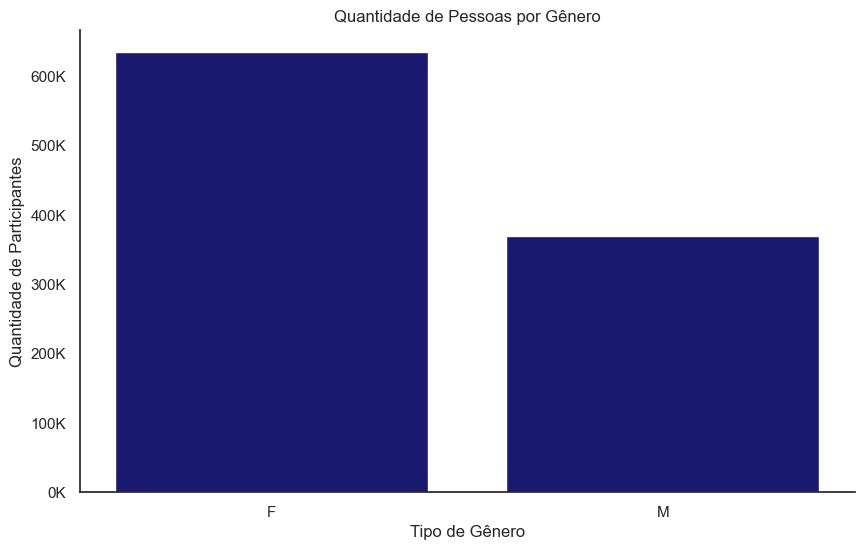

In [42]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_500['TP_SEXO'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Gênero')
plt.xlabel('Tipo de Gênero')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<Figure size 640x480 with 0 Axes>

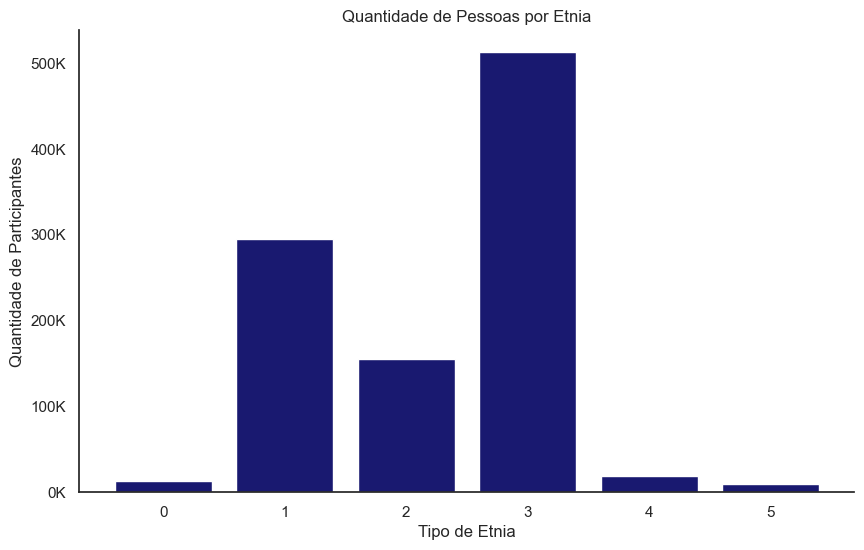

In [43]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_500['TP_COR_RACA'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Quantidade de Pessoas por Etnia')
plt.xlabel('Tipo de Etnia')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Etnias:</h4>
  <ul>
    <li>0: Não declarado</li>
    <li>1: Branca</li>
    <li>2: Preta</li>
    <li>3: Parda</li>
    <li>4: Amarela</li>
    <li>5: Indígena</li>
    <li>6: Não dispõe da informação</li>
  </ul>
</body>


<Figure size 640x480 with 0 Axes>

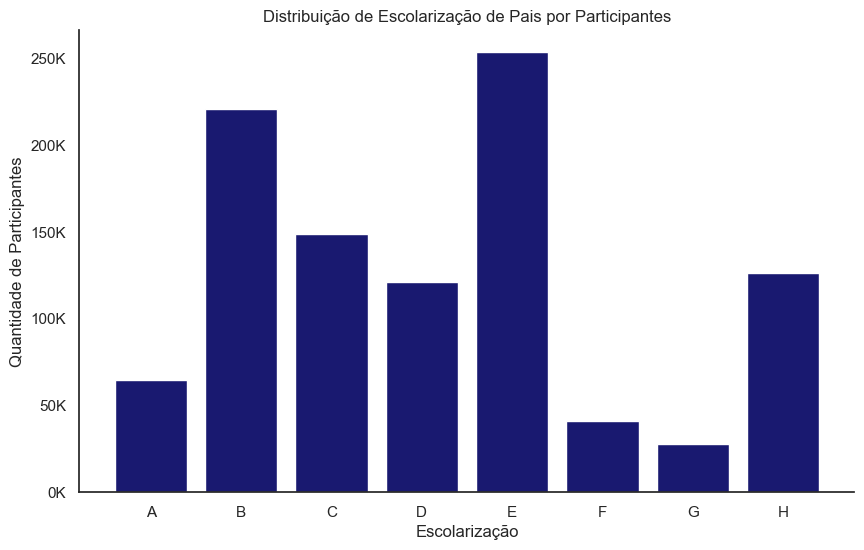

In [44]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_500['Q001'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de Escolarização de Pais por Participantes')
plt.xlabel('Escolarização')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
  <h4>Categorias de Escolarização</h4>
  <ul>
    <li>A: Nunca estudou.</li>
    <li>B: Não completou a 4ª série/5º ano do Ensino Fundamental.</li>
    <li>C: Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.</li>
    <li>D: Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.</li>
    <li>E: Completou o Ensino Médio, mas não completou a Faculdade.</li>
    <li>F: Completou a Faculdade, mas não completou a Pós-graduação.</li>
    <li>G: Completou a Pós-graduação.</li>
    <li>H: Não sei.</li>
  </ul>
</body>


<Figure size 640x480 with 0 Axes>

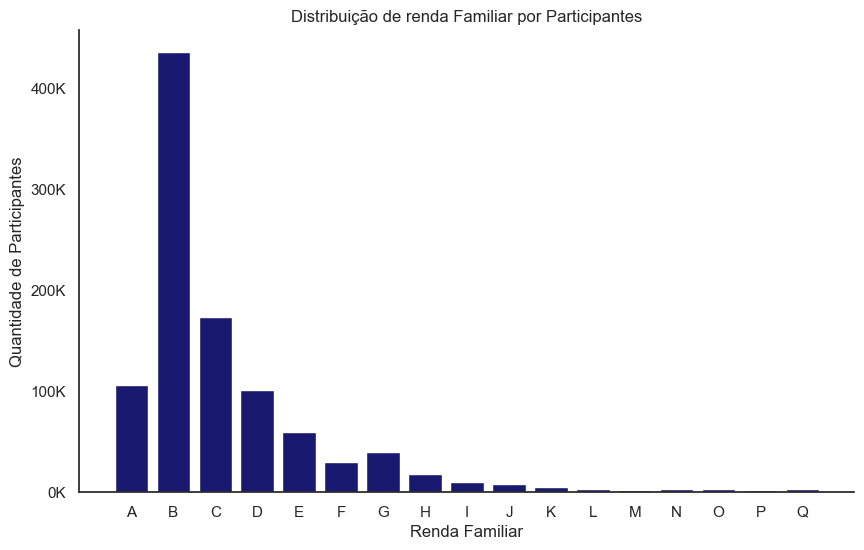

In [45]:
# Contando as ocorrências das categorias usando numpy
unique, counts = np.unique(df_500['Q006'], return_counts=True)

# Definindo o estilo do gráfico
sns.set_style('white')
sns.despine()

# Criando o gráfico de colunas com matplotlib
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, color='midnightblue')
plt.title('Distribuição de renda Familiar por Participantes')
plt.xlabel('Renda Familiar')
plt.ylabel('Quantidade de Participantes')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '%1.0fK' % (x*1e-3)))
sns.despine(top = True, right = True)
plt.show();

<body>
<h3>Faixas de Renda Familiar</h3>
<body>
  <h5>A: Nenhuma Renda</h5>
    
  <h5>B: Até R$ 1.320,00</h5>
  
  <h5>C: De R$ 1.320,01 até R$ 1.980,00</h5>
  <h5>D: De R$ 1.980,01 até R$ 2.640,00</h5>
  <h5>E: De R$ 2.640,01 até R$ 3.300,00</h5>
  <h5>F: De R$ 3.300,01 até R$ 3.960,00</h5>
  <h5>G: De R$ 3.960,01 até R$ 5.280,00</h5>
  <h5>H: De R$ 5.280,01 até R$ 6.600,00</h5>
  <h5>I: De R$ 6.600,01 até R$ 7.920,00</h5>
  <h5>J: De R$ 7.920,01 até R$ 9.240,00</h5>
  <h5>K: De R$ 9.240,01 até R$ 10.560,00</h5>
  <h5>L: De R$ 10.560,01 até R$ 11.880,00</h5>
  <h5>M: De R$ 11.880,01 até R$ 13.200,00</h5>
  <h5>N: De R$ 13.200,01 até R$ 15.840,00</h5>
  <h5>O: De R$ 15.840,01 até R$ 19.800,00</h5>
  <h5>P: De R$ 19.800,01 até R$ 26.400,00</h5>
  <h5>Q: Acima de R$ 26.400,00</h5>
</body>


<body>
    <!-- Título Principal -->
    <h1>Considerações Finais</h1>
    <!-- Seção sobre Renda Familiar -->
    <h2>Impacto da Renda Familiar</h2>
    <p>Famílias com melhores rendas tendem a apresentar filhos com melhores notas no ENEM.</p>
    <!-- Seção sobre Escolaridade dos Pais -->
    <h2>Escolaridade dos Pais</h2>
    <p>
        O nível de escolaridade do pai influencia significativamente a nota do filho no ENEM. 
        <ul>
            <li>Diferenças são mais pronunciadas entre pais com ensino médio ou inferior.</li>
            <li>Pouca diferença é observada entre pais com graduação e pós-graduação.</li>
        </ul>
    </p>
    <!-- Seção sobre Gênero -->
    <h2>Impacto do Gênero</h2>
    <p>Não existe uma diferença significativa de desempenho entre candidatos do gênero masculino e feminino.</p>
    <!-- Seção sobre Etnia -->
    <h2>Impacto da Etnia</h2>
    <p>
        A análise revelou que:
        <ul>
            <li>Candidatos brancos apresentaram as melhores notas, em média.</li>
            <li>Candidatos indígenas tiveram as menores notas.</li>
            <li>Candidatos de outras etnias ficaram em níveis intermediários.</li>
        </ul>
    </p>
    <!-- Seção sobre Tipo de Escola -->
    <h2>Tipo de Escola</h2>
    <p>Estudantes de escolas privadas obtiveram resultados significativamente melhores do que os de escolas públicas.</p>
    <!-- Perfil das Pessoas com Notas Acima de 800 -->
    <h2>Perfil: Notas Acima de 800</h2>
    <p>Pessoas que alcançaram notas acima de 800 apresentaram as seguintes características:</p>
    <ul>
        <li>Frequentaram escolas privadas.</li>
        <li>São, majoritariamente, homens.</li>
        <li>Pertencem, em sua maioria, às etnias branca ou parda.</li>
        <li>Tiveram pais com escolaridade no ensino médio, graduação ou pós-graduação.</li>
        <li>Possuem uma maior distribuição de renda familiar.</li>
    </ul>
    <!-- Perfil das Pessoas com Notas Abaixo de 500 -->
    <h2>Perfil: Notas Abaixo de 500</h2>
    <p>Pessoas que alcançaram notas abaixo de 500 apresentaram as seguintes características:</p>
    <ul>
        <li>Frequentaram escolas públicas.</li>
        <li>São, majoritariamente, mulheres.</li>
        <li>Pertencem, em sua maioria, às etnias parda ou branca.</li>
        <li>Tiveram pais com escolaridade concentrada no ensino médio ou inferior.</li>
        <li>Possuem uma menor distribuição de renda familiar.</li>
    </ul>
</body>
</html>

In [47]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = data[['SAT', 'Rand 1,2,3']]
y = data['GPA']